In [1]:
#April_12_Spam Detection_Naive Bayes

In [ ]:
Naïve Bayes Classifier Algorithm
Naïve Bayes algorithm is a supervised learning algorithm, 
Based on Bayes theorem and used for solving classification problems.
Mainly used in text classification 
It is a probabilistic classifier, which means it predicts on the basis of the probability 
of an object.
Some popular examples:-
spam filtration, Sentimental analysis, and classifying articles.

In [ ]:
Why is it called Naïve Bayes?
comprised of two words Naïve and Bayes,

Naïve: It is called Naïve because it assumes that the occurrence of 
    a certain feature is independent of the occurrence of other features. 
Bayes: It is called Bayes because it depends on the principle of Bayes' Theorem.    

In [ ]:
Bayes Theorem 
P(A/B)=P(B/A)*P(A)/P(B)
P(A/B):- POSTERIOR PROBABILITY
P(B/A):-LIKLIHOOD
P(A):-PRIOR
P(B):-MARGINAL PROBABILITY

In [ ]:
Probability and Likelihood: -
In context where numbers are not important, we can talk about the likelihood of something happening.
Likelihood is used to talk in very general terms about whether there is a chance that 
something will happen or not.
Example:-
The treaty increases the likelihood that the cease fire will hold.
There’s every likelihood that he’ll graduate university on time.
There is very little likelihood that the publisher will publish your book.
 On the other hand :-
Probability is like chance , used to described the level of how likely it is that something will happen.
Examples:-
What’s is the probability of winning?
There’s a high probability of us having moved house by then.
The value of probability between 0 and 1.It is less than 1.
The likelihood can be more than 1.


In [1]:
import pandas as pd # use for dataframe editing
import numpy as np # mathematical calculation

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("spam.csv")

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

In [3]:
data=pd.read_csv("spam.csv",encoding="latin-1")

In [4]:
data.info()# information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5575 entries, 0 to 5574
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5575 non-null   object
 1   v2          5575 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.9+ KB


In [5]:
df=data.copy()
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [6]:
df["v2"][3]

'U dun say so early hor... U c already then say...'

In [7]:
df["v2"][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [8]:
df["v2"][4]

"Nah I don't think he goes to usf, he lives around here though"

In [9]:
df=df[["v2","v1"]].rename(columns={"v2":"email","v1":"label"})

In [10]:
df.head()

email label
0  Go until jurong point, crazy.. Available only ...   ham
1                      Ok lar... Joking wif u oni...   ham
2  Free entry in 2 a wkly comp to win FA Cup fina...  spam
3  U dun say so early hor... U c already then say...   ham
4  Nah I don't think he goes to usf, he lives aro...   ham

In [11]:
df["label"].value_counts()

label
ham     4826
spam     749
Name: count, dtype: int64

In [12]:
df["label"]=df["label"].map({"ham":0,"spam":1})
df["label"].value_counts()

label
0    4826
1     749
Name: count, dtype: int64

In [13]:
df.head()

email  label
0  Go until jurong point, crazy.. Available only ...      0
1                      Ok lar... Joking wif u oni...      0
2  Free entry in 2 a wkly comp to win FA Cup fina...      1
3  U dun say so early hor... U c already then say...      0
4  Nah I don't think he goes to usf, he lives aro...      0

In [14]:
X=df["email"]

Y=df["label"]

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10,stratify=Y)

In [16]:
X_train.head()

3077               Okay but i thought you were the expert
3594     Huh but i cant go 2 ur house empty handed right?
4707    Did you say bold, then torch later. Or one tor...
3762                   K.i will send in  &lt;#&gt;  min:)
4880                          When/where do I pick you up
Name: email, dtype: object

In [24]:
X_train.shape

(4460,)

In [17]:
X_test.head()

3916    Eh ur laptop got no stock lei... He say mon mu...
1518        Shall i ask one thing if you dont mistake me.
4414    Yeah I should be able to, I'll text you when I...
1411    somewhere out there beneath the pale moon ligh...
4850    Gain the rights of a wife.dont demand it.i am ...
Name: email, dtype: object

In [13]:
# Creation of Bag of words

In [18]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# we will discuss all in detail in NLP

In [37]:
#vectorizer=TfidfVectorizer()
vectorizer=CountVectorizer()

In [38]:
new_X_train=vectorizer.fit(X_train)

In [39]:
new_X_train

CountVectorizer()

In [40]:
X_train_vectorized=vectorizer.transform(X_train)

In [41]:
X_train_vectorized

<4460x7623 sparse matrix of type '<class 'numpy.int64'>'
	with 58958 stored elements in Compressed Sparse Row format>

In [42]:
X_train_vectorized.shape

(4460, 7623)

In [43]:
X_test_vectorized=vectorizer.transform(X_test)

In [44]:
X_test_vectorized.shape

(1115, 7623)

In [45]:
X_test_vectorized.dtype

dtype('int64')

In [46]:
X_train_vectorized.shape

(4460, 7623)

# TO SEE THE BAG OF WORDS

In [47]:
count_array=X_train_vectorized.toarray()

In [48]:
count_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [49]:
# to display the Bag of words

df100=pd.DataFrame(data=count_array,columns=vectorizer.get_feature_names_out())

In [50]:
pd.set_option("display.max_columns",10000)

In [54]:
df100.head(10)

00  000  000pes  0089  01223585236  01223585334  0125698789  02  0207  \
0   0    0       0     0            0            0           0   0     0   
1   0    0       0     0            0            0           0   0     0   
2   0    0       0     0            0            0           0   0     0   
3   0    0       0     0            0            0           0   0     0   
4   0    0       0     0            0            0           0   0     0   
5   0    0       0     0            0            0           0   0     0   
6   0    0       0     0            0            0           0   0     0   
7   0    0       0     0            0            0           0   0     0   
8   0    0       0     0            0            0           0   0     0   
9   0    0       0     0            0            0           0   0     0   

   02072069400  021  03  04  05  050703  0578  06  07  07008009200  \
0            0    0   0   0   0       0     0   0   0            0   
1            0    0   0   0   0       0     0   0   0            0   
2            0    0   0   0   0       0     0   0   0            0   
3            0    0   0   0   0       0     0   0   0            0   
4            0    0   0   0   0       0     0   0   0            0   
5            0    0   0   0   0       0     0   0   0            0   
6            0    0   0   0   0       0     0   0   0            0   
7            0    0   0   0   0       0     0   0   0            0   
8            0    0   0   0   0       0     0   0   0            0   
9            0    0   0   0   0       0     0   0   0            0   

   07046744435  07090201529  07090298926  07099833605  07123456789  0721072  \
0            0            0            0            0            0        0   
1            0            0            0            0            0        0   
2            0            0            0            0            0        0   
3            0            0            0            0            0        0   
4            0            0            0            0            0        0   
5            0            0            0            0            0        0   
6            0            0            0            0            0        0   
7            0            0            0            0            0        0   
8            0            0            0            0            0        0   
9            0            0            0            0            0        0   

   07732584351  07734396839  07742676969  0776xxxxxxx  07781482378  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   
5            0            0            0            0            0   
6            0            0            0            0            0   
7            0            0            0            0            0   
8            0            0            0            0            0   
9            0            0            0            0            0   

   07786200117  07808  07808726822  07815296484  07821230901  078498  \
0            0      0            0            0            0       0   
1            0      0            0            0            0       0   
2            0      0            0            0            0       0   
3            0      0            0            0            0       0   
4            0      0            0            0            0       0   
5            0      0            0            0            0       0   
6            0      0            0            0            0       0   
7            0      0            0            0            0       0   
8            0      0            0            0            0       0   
9            0      0            0

In [55]:
df100.tail()

00  000  000pes  0089  01223585236  01223585334  0125698789  02  0207  \
4455   0    0       0     0            0            0           0   0     0   
4456   0    0       0     0            0            0           0   0     0   
4457   0    0       0     0            0            0           0   0     0   
4458   0    0       0     0            0            0           0   0     0   
4459   0    0       0     0            0            0           0   0     0   

      02072069400  021  03  04  05  050703  0578  06  07  07008009200  \
4455            0    0   0   0   0       0     0   0   0            0   
4456            0    0   0   0   0       0     0   0   0            0   
4457            0    0   0   0   0       0     0   0   0            0   
4458            0    0   0   0   0       0     0   0   0            0   
4459            0    0   0   0   0       0     0   0   0            0   

      07046744435  07090201529  07090298926  07099833605  07123456789  \
4455            0            0            0            0            0   
4456            0            0            0            0            0   
4457            0            0            0            0            0   
4458            0            0            0            0            0   
4459            0            0            0            0            0   

      0721072  07732584351  07734396839  07742676969  0776xxxxxxx  \
4455        0            0            0            0            0   
4456        0            0            0            0            0   
4457        0            0            0            0            0   
4458        0            0            0            0            0   
4459        0            0            0            0            0   

      07781482378  07786200117  07808  07808726822  07815296484  07821230901  \
4455            0            0      0            0            0            0   
4456            0            0      0            0            0            0   
4457            0            0      0            0            0            0   
4458            0            0      0            0            0            0   
4459            0            0      0            0            0            0   

      078498  07880867867  0789xxxxxxx  07946746291  0796xxxxxx  07973788240  \
4455       0            0            0            0           0            0   
4456       0            0            0            0           0            0   
4457       0            0            0            0           0            0   
4458       0            0            0            0           0            0   
4459       0            0            0            0           0            0   

      08  0800  08000407165  08000776320  08000839402  08000930705  \
4455   0     0            0            0            0            0   
4456   0     0            0            0            0            0   
4457   0     0            0            0            0            0   
4458   0     0            0            0            0            0   
4459   0     0            0            1            0            0   

      08000938767  08001950382  08002888812  08002986030  08002986906  \
4455            0            0            0            0            0   
4456            0            0            0            0            0   
4457            0            0            0            0            0   
4458            0            0            0            0            0   
4459            0            0            0            0            0   

      08006344447  0808  08081560665  0825  083  0844  08448350055  \
4455            0     0            0     0    0     0            0   
4456            0     0            0     0    0     0            0   
4457            0     0            0     0    0     0            0   
4458            0     0            0     0    0     0            0   
4459            0     0            0     0    0     0            0

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5575 entries, 0 to 5574
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   5575 non-null   object
 1   label   5575 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [102]:
# lets train the model 

In [58]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB

Types of Naïve Bayes Model:
There are three types of Naive Bayes Model, which are given below:

Gaussian: The Gaussian model assumes that features follow a normal distribution. 
    This means if predictors take continuous values instead of discrete, then the 
    model assumes that these values are sampled from the Gaussian distribution.

    Multinomial: The Multinomial Naïve Bayes classifier is used when the data is multinomial 
    distributed. It is primarily used for document classification problems, 
    it means a particular document belongs to which category such as Sports, 
    Politics, education, etc.
The classifier uses the frequency of words for the predictors.

Bernoulli: The Bernoulli classifier works similar to the Multinomial classifier, 
    but the predictor variables are the independent Booleans variables. 
    Such as if a particular word is present or not in a document. 
    This model is also famous for document classification tasks.

In [ ]:
Gaussian Naive Bayes
Gaussian Naive Bayes is useful when working with continuous values which 
probabilities can be modeled using a Gaussian distribution:

In [ ]:
Multinomial naive Bayes
A multinomial distribution is useful to model feature vectors where each 
value represents, for example, the number of occurrences of a term or 
its relative frequency. If the feature vectors have n elements and each 
of them can assume k different values with probability pk

In [ ]:
Bernoulli naive Bayes
If X is random variable Bernoulli-distributed, it can assume only two values 
(for simplicity, let’s call them 0 and 1) and their probability

In [59]:
mnb=MultinomialNB()

In [60]:
mnb.fit(X_train_vectorized,Y_train)

MultinomialNB()

In [61]:
prediction=mnb.predict(X_test_vectorized)

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [63]:
accuracy_score(Y_test,prediction)

0.9919282511210762

In [64]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       965
           1       0.99      0.95      0.97       150

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [65]:
Y_train_predict=mnb.predict(X_train_vectorized)

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [67]:
#Accuracy
print("Training accuracy",accuracy_score(Y_train,Y_train_predict))

Training accuracy 0.9932735426008968


In [68]:
#Accuracy
print("Test accuracy",accuracy_score(Y_test,prediction))

Test accuracy 0.9919282511210762


In [69]:
CM=confusion_matrix(Y_test,prediction)

Text(33.22222222222222, 0.5, 'Actual')

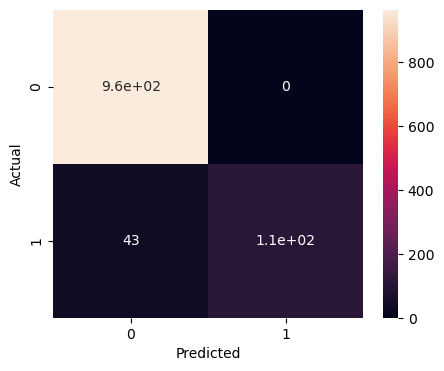

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
# visualization of CM
plt.figure(figsize=(5,4))
sns.heatmap(CM,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [117]:
TN,FP,FN,TP=CM.ravel()
print(TN,FP,FN,TP)

965 0 43 107


In [118]:
TN,FP,FN,TP=CM.flatten()
print(TN,FP,FN,TP)

965 0 43 107


In [119]:
Specificity=TN/(TN+FP)# TRUE NEGATIVE RATE
Recall=TP/(TP+FN)
PRECISION=TP/(TP+FP)

Balanced_accuracy=(Recall+Specificity)/2

print("specificity \n ", Specificity)
print("Recall \n",Recall)
print("precision\n", PRECISION)
print("balance \n",Balanced_accuracy)

specificity 
  1.0
Recall 
 0.7133333333333334
precision
 1.0
balance 
 0.8566666666666667


In [38]:
# create a function to check the performance

In [70]:
def enter_text(message):
    if mnb.predict(vectorizer.transform([message]))==1:
        print("This is a spam")
    else:
        print("This is a Normal email")

In [71]:
enter_text("hello friend we are learning spam detection")

This is a Normal email


In [72]:
enter_text("you are a winner, your secret code is 34343")

This is a spam


In [73]:
enter_text(" your resume has been shortlisted , you can win")

This is a Normal email


In [74]:
enter_text(" good chance to win exiting prize")

This is a spam


In [75]:
enter_text("you are winner urgent message from office")

This is a spam


In [126]:
enter_text("winner urgent message from office")

This is a Normal email


In [127]:
enter_text("winner")

This is a spam


In [128]:
enter_text("you can winner prize")

This is a spam


In [129]:
enter_text("I have a prize")

This is a spam


In [131]:
enter_text("you are a winner")

This is a Normal email
